# Importing

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
import json
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim
import folium
import random
import time

In [4]:
nomi_obj = Nominatim(user_agent='IBM-coursera')

In [5]:
pd.set_option('display.max_rows', None)

# Defining Functions

### Coordinates: Receives a list of location names, returns a dataframe containing the names and the coordinates.

In [106]:
def frame_coords(lst, col_name='venue'):
    
    nomi_obj = Nominatim(user_agent='IBM-coursera')
    
    coords = []
    fail_list = []
    
    cnt = 0
    for item in lst:
        
        cnt2 = 0
        try:
            location = None
            while (location==None) and (cnt2<5):
                location = nomi_obj.geocode(item)
                cnt2+=1
                        
            if location!=None: coords.append((item, location[1][0], location[1][1]))
            else: 
                fail_list.append(item)
                print('Fail:', item)
                
            cnt = cnt+1
            if cnt in range(1, 500, 8): print('Appended:', len(coords), 'Attempts:', cnt)
        except: print(nomi_obj.geocode(item), location)
            
    print('Fail List: ', fail_list) 
    print('Completed')
    return pd.DataFrame(coords, columns=[col_name, 'lat', 'lng'])

In [6]:
frame_coords(['Rio de Janeiro, RJ'], 'rio')   # Testing

Appended: 1 Attempts: 1
Fail List:  []
Completed


,rio,lat,lng
0,"Rio de Janeiro, RJ",-22.911014,-43.209373


### Mapping Functions

#### Receives a Dataframe containing location names and coordinates, plots the map and marks each location with a circle.

In [55]:
def plot_map(df, zoom=10):
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start = zoom)


    for lat, lng, label in zip(df['lat'], df['lng'], df.iloc[:, 0]):
    
        label = folium.Popup(label, html_parser=True)
        folium.CircleMarker([lat, lng],
                            popup=label,
                            radius=3,
                            color='darkorange',
                            #fill=True,
                            #fill_color='blue',
                            #fill_oppacity=0.8
                           ).add_to(mapa)
    return mapa

In [78]:
def plot_map_lite(df, zoom=11):
    
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start=zoom)

    for lat, lng, label in zip(df['lat'].values, df['lng'].values, df.iloc[:, 0].values):
    
        #label = folium.Popup(label, html_parser=True)
        folium.CircleMarker([lat, lng],
                            #popup=label,
                            radius=2,
                            color='darkred',
                            #fill=True,
                            #fill_color='blue',
                            #fill_oppacity=0.8
                           ).add_to(mapa)
        
    return mapa

#### Receives a Dataframe containing location names, coordinates and radius values, plots map and draw circles around each location considering its radius.

In [57]:
def plot_search_map(df, zoom=11):
         
    mapa = folium.Map(location = [-22.911014, -43.209373], zoom_start=zoom)

    for lat, lng, label, radius in zip(df['lat'].values, df['lng'].values, df['bairros'].values, df['radius'].values):
    
        #label = folium.Popup(label, html_parser=True)
        folium.Circle([lat, lng],
                      radius=radius,
                      color='darkred',
                      #popup=label,
                      #fill=True,
                      #fill_color='blue',
                      #fill_oppacity=0.8
                     ).add_to(mapa)
    return mapa
    

# Initial Data Collection: Neighborhoods Names

In [9]:
a_g = '''Abolição
 Acari
 Água Santa
 Alto da Boa Vista
 Anchieta
 Andaraí
 Anil
 Bancários
 Bangu
 Barra da Tijuca
 Barra de Guaratiba
 Barros Filho
 Benfica
 Bento Ribeiro
 Bonsucesso
 Botafogo
 Brás de Pina
 Cachambi
 Cacuia
 Caju
 Camorim
 Campinho
 Campo dos Afonsos
 Campo Grande
 Cascadura
 Catete
 Catumbi
 Cavalcanti
 Centro
 Cidade de Deus
 Cidade Nova
 Cidade Universitária
 Cocotá
 Coelho Neto
 Colégio
 Complexo do Alemão
 Copacabana
 Cordovil
 Cosme Velho
 Cosmos
 Costa Barros
 Curicica
 Del Castilho
 Deodoro
 Encantado
 Engenheiro Leal
 Engenho da Rainha
 Engenho de Dentro
 Engenho Novo
 Estácio
 Flamengo
 Freguesia (Ilha do Governador)
 Freguesia (Jacarepaguá)
 Galeão
 Gamboa
 Gardênia Azul
 Gávea
 Gericinó
 Glória
 Grajaú
 Grumari
 Guadalupe
 Guaratiba'''

In [10]:
bairros1 = a_g.split('\n ')

In [11]:
h_p = ''' Higienópolis
 Honório Gurgel
 Humaitá
 Imperial de São Cristóvão
 Inhaúma
 Inhoaíba
 Ipanema
 Irajá
 Itanhangá
 Jabour
 Jacaré
 Jacarepaguá
 Jacarezinho
 Jardim América
 Jardim Botânico
 Jardim Carioca
 Jardim Guanabara
 Jardim Sulacap
 Joá
 Lagoa
 Lapa
 Laranjeiras
 Leblon
 Leme
 Lins de Vasconcelos
 Madureira
 Magalhães Bastos
 Mangueira
 Manguinhos
 Maracanã
 Maré
 Marechal Hermes
 Maria da Graça
 Méier
 Moneró
 Olaria
 Oswaldo Cruz
 Paciência
 Padre Miguel
 Paquetá
 Parada de Lucas
 Parque Anchieta
 Parque Columbia
 Pavuna
 Pechincha
 Pedra de Guaratiba
 Penha
 Penha Circular
 Piedade
 Pilares
 Pitangueiras
 Portuguesa
 Praça da Bandeira
 Praça Seca
 Praia da Bandeira'''

In [12]:
bairros2 = h_p.split('\n ')

In [13]:
q_z = '''Quintino Bocaiúva
 Ramos
 Realengo
 Recreio dos Bandeirantes
 Riachuelo
 Ribeira
 Ricardo de Albuquerque
 Rio Comprido
 Rocha
 Rocha Miranda
 Rocinha
 Sampaio
 Santa Cruz
 Santa Teresa
 Santíssimo
 Santo Cristo
 São Conrado
 São Francisco Xavier
 Saúde
 Senador Camará
 Senador Vasconcelos
 Sepetiba
 Tanque
 Taquara
 Tauá
 Tijuca
 Todos os Santos
 Tomás Coelho
 Turiaçu
 Urca
 Vargem Grande
 Vargem Pequena
 Vasco da Gama
 Vaz Lobo
 Vicente de Carvalho
 Vidigal
 Vigário Geral
 Vila Cosmos
 Vila da Penha
 Vila Isabel
 Vila Kennedy
 Vila Militar
 Vila Valqueire
 Vista Alegre
 Zumbi'''

In [14]:
bairros3 = q_z.split('\n ')

In [15]:
bairros = bairros1+bairros2+bairros3

# Using Geopy Library to Get Neighborhoods Coordinates

## Formatting Neighborhoods Names for Search

In [16]:
bairros_rj = [i+', Rio de Janeiro' for i in bairros]

to_fix = ['Freguesia (Ilha do Governador), Rio de Janeiro', 'Imperial de São Cristóvão, Rio de Janeiro', 'Vila Cosmos, Rio de Janeiro']

fixed = ['Freguesia, Ilha do Governador', 'Imperial de São Cristóvão, RJ', 'Vila Cosmos, RJ']

index = [bairros_rj.index(i) for i in to_fix]

for i in range(3):
    bairros_rj[index[i]] = fixed[i]

In [17]:
bairros_rj

['Abolição, Rio de Janeiro',
 'Acari, Rio de Janeiro',
 'Água Santa, Rio de Janeiro',
 'Alto da Boa Vista, Rio de Janeiro',
 'Anchieta, Rio de Janeiro',
 'Andaraí, Rio de Janeiro',
 'Anil, Rio de Janeiro',
 'Bancários, Rio de Janeiro',
 'Bangu, Rio de Janeiro',
 'Barra da Tijuca, Rio de Janeiro',
 'Barra de Guaratiba, Rio de Janeiro',
 'Barros Filho, Rio de Janeiro',
 'Benfica, Rio de Janeiro',
 'Bento Ribeiro, Rio de Janeiro',
 'Bonsucesso, Rio de Janeiro',
 'Botafogo, Rio de Janeiro',
 'Brás de Pina, Rio de Janeiro',
 'Cachambi, Rio de Janeiro',
 'Cacuia, Rio de Janeiro',
 'Caju, Rio de Janeiro',
 'Camorim, Rio de Janeiro',
 'Campinho, Rio de Janeiro',
 'Campo dos Afonsos, Rio de Janeiro',
 'Campo Grande, Rio de Janeiro',
 'Cascadura, Rio de Janeiro',
 'Catete, Rio de Janeiro',
 'Catumbi, Rio de Janeiro',
 'Cavalcanti, Rio de Janeiro',
 'Centro, Rio de Janeiro',
 'Cidade de Deus, Rio de Janeiro',
 'Cidade Nova, Rio de Janeiro',
 'Cidade Universitária, Rio de Janeiro',
 'Cocotá, Rio d

## Searching with Geopy

In [186]:
hoods = [praias_rj, bairros_rj]
hoods_names = ['praias', 'bairros']

In [193]:
half = frame_coords(bairros_rj[:76], 'bairros')
other_half = frame_coords(bairros_rj[76:], 'bairros')

Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Appended: 17 Attempts: 17
Appended: 25 Attempts: 25
Appended: 33 Attempts: 33
Appended: 41 Attempts: 41
Appended: 49 Attempts: 49
Appended: 57 Attempts: 57
Appended: 65 Attempts: 65
Appended: 73 Attempts: 73
Fail List:  []
Completed
Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Appended: 17 Attempts: 17
Appended: 25 Attempts: 25
Appended: 33 Attempts: 33
Appended: 41 Attempts: 41
Appended: 49 Attempts: 49
Appended: 57 Attempts: 57
Appended: 65 Attempts: 65
Appended: 73 Attempts: 73
Appended: 81 Attempts: 81
Fail List:  []
Completed


In [563]:
bairros_df = pd.concat([half, other_half], axis=0)

#### Coordinates Aquired

### Formatting search names back

In [564]:
bairros_df['bairros'] = [i[:-16] if i not in fixed else (to_fix[0][:-16] if i==fixed[0] else i[:-4]) for i in bairros_df['bairros']]

## Evaluating Result

In [ ]:
plot_map(bairros_df, zoom=11)

## Spotting Bad Results: Outliers

In [495]:
bairros_df.describe()

,lat,lng,area,radius
count,163.000000,163.000000,1.630000e+02,163.000000
mean,-22.034582,-44.794142,7.387408e+06,1171.376029
std,7.362797,7.638167,1.839828e+07,992.677595
min,-34.576697,-104.626243,1.611178e+05,226.462764
25%,-22.930916,-43.375841,1.343236e+06,653.839580
50%,-22.891522,-43.296776,2.534304e+06,898.161495
75%,-22.847531,-43.227707,4.744831e+06,1228.933493
max,40.755393,-43.109199,1.395012e+08,6663.678713


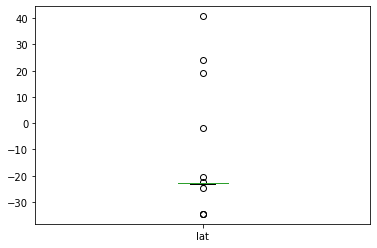

In [566]:
bairros_df.plot(kind='box', y='lat')

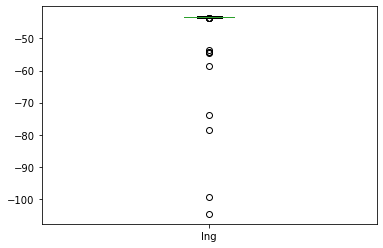

In [451]:
bairros_df.plot(kind='box', y='lng')

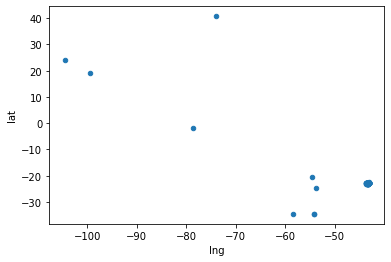

In [550]:
bairros_df.plot(kind='scatter', x='lng', y='lat')

#### Above we can see the outliers and the correct observations groupped in the extreme right.

<ipython-input-515-1c7777508d11>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bairros_df[bairros_df['lat']>-24][bairros_df['lat']<-22.7].plot(kind='scatter', x='lng', y='lat')


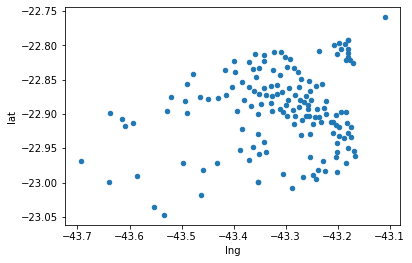

In [515]:
bairros_df[bairros_df['lat']>-24][bairros_df['lat']<-22.7].plot(kind='scatter', x='lng', y='lat')

#### Above we can see the correct observations isolated. Note how the scale is much smaller.

In [529]:
bad_lat = pd.concat([bairros_df[bairros_df['lat']>-22.7], bairros_df[bairros_df['lat']<-24]], axis=0)

In [530]:
bad_lat

,bairros,lat,lng,area,radius
2,água santa,-1.680751,-78.635140,2.426232e+06,878.802356
28,centro,-20.429425,-54.596237,5.424739e+06,1314.057881
30,cidade nova,40.755393,-73.989783,9.348529e+05,545.502443
34,colégio,-22.507101,-43.136713,2.261110e+06,848.371235
61,guadalupe,24.043406,-104.626243,3.820008e+06,1102.699509
130,santa cruz,19.300277,-99.506041,1.250443e+08,6308.948836
126,rocha,-34.576697,-54.126319,1.311626e+06,646.145027
127,rocha miranda,-34.576697,-54.126319,2.886706e+06,958.575457
140,tanque,-34.498114,-58.532314,5.567990e+06,1331.294969
161,vista alegre,-24.750625,-53.724992,5.152091e+05,404.964362


## Getting Bad Coordinates Right

In [532]:
fixed_coords = frame_coords(bad_lat['bairros']+', RJ')

Appended: 1 Attempts: 1
Appended: 9 Attempts: 9
Fail List:  []
Completed


In [533]:
fixed_coords['venue'] = [i[:-4] for i in fixed_coords['venue']]

In [569]:
fixed_coords

,venue,lat,lng
0,água santa,-22.911143,-43.312126
1,centro,-22.904393,-43.183065
2,cidade nova,-22.910051,-43.201756
3,colégio,-22.839790,-43.335762
4,guadalupe,-22.837621,-43.375161
5,santa cruz,-22.917625,-43.683491
6,rocha,-22.899562,-43.248807
7,rocha miranda,-22.850347,-43.346305
8,tanque,-22.915193,-43.355747
9,vista alegre,-22.829624,-43.315128


In [ ]:
plot_map(fixed_coords)

## Replacing Bad Coordinates

In [584]:
bairros_df.loc[bad_lat.index, 0:3] = fixed_coords.values

## Checking

In [585]:
bairros_df.loc[bad_lat.index]

,bairros,lat,lng
2,água santa,-22.911143,-43.312126
28,centro,-22.904393,-43.183065
30,cidade nova,-22.910051,-43.201756
34,colégio,-22.839790,-43.335762
61,guadalupe,-22.837621,-43.375161
130,santa cruz,-22.917625,-43.683491
126,rocha,-22.899562,-43.248807
127,rocha miranda,-22.850347,-43.346305
140,tanque,-22.915193,-43.355747
161,vista alegre,-22.829624,-43.315128


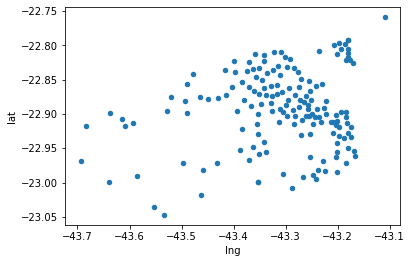

In [581]:
bairros_df.plot(kind='scatter', y='lat', x='lng')

## Saving/Loading

In [586]:
#bairros_df.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/coords_bairros.csv')

In [583]:
bairros_df = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/coords_bairros.csv', index_col=0)

# Getting Neighborhoods Areas from data.rio Data

### Loading

In [293]:
data_rio = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\Limite_de_Bairros.csv')

## Crossing New and Previous Neighborhoods.

In [294]:
only_datario = [i for i in data_rio['NOME'] if i.strip().lower() not in [j.strip().lower() for j in bairros]]

In [295]:
only_bairros = [i for i in bairros if i.strip().lower() not in [j.strip().lower() for j in data_rio['NOME']]]

In [296]:
only_datario, only_bairros          

(['Freguesia (Ilha)          ',
  'Parque Colúmbia           ',
  'Vila Kosmos               ',
  'Turiaçú                   ',
  'Osvaldo Cruz              ',
  'São Cristóvão             '],
 ['Freguesia (Ilha do Governador)',
  'Imperial de São Cristóvão',
  'Oswaldo Cruz',
  'Parque Columbia',
  'Turiaçu',
  'Vila Cosmos'])

## Processing data.rio Data

In [298]:
datario_area = data_rio[['NOME', 'Área']].rename(columns={'NOME':'bairros'})
datario_area['bairros'] = [i.strip().lower() for i in datario_area['bairros']]

bairros_copy = bairros_df.copy()
bairros_copy['bairros'] = [i.strip().lower() for i in bairros_copy['bairros']]

In [302]:
b1 = bairros_copy['bairros'].values

b2 = datario_area['bairros'].values

out1 = [i for i in b1 if i not in b2]

out2 = [i for i in b2 if i not in b1]

In [303]:
out1

['freguesia (ilha do governador)',
 'imperial de são cristóvão',
 'oswaldo cruz',
 'parque columbia',
 'turiaçu',
 'vila cosmos']

In [304]:
out2

['freguesia (ilha)',
 'parque colúmbia',
 'vila kosmos',
 'turiaçú',
 'osvaldo cruz',
 'são cristóvão']

In [305]:
out_index = datario_area[datario_area['bairros'].isin(out2)].index
datario_area['bairros'][out_index] = ['freguesia (ilha do governador)',    
                                                 'parque columbia',
                                                 'vila cosmos',
                                                 'turiaçu',
                                                 'oswaldo cruz',                                            
                                                 'imperial de são cristóvão']

<ipython-input-305-a358c46e88c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datario_area['bairros'][out_index] = ['freguesia (ilha do governador)',


## Merging data.rio area data with neighborhoods dataframe

In [306]:
datario_area

,bairros,Área
0,paquetá,1.705685e+06
1,freguesia (ilha do governador),4.056403e+06
2,bancários,9.780465e+05
3,galeão,1.895742e+07
4,tauá,1.672546e+06
...,...,...
158,campo grande,1.044451e+08
159,bangu,3.596620e+07
160,gericinó,2.534304e+06
161,jabour,3.273271e+05


In [307]:
bairros_copy

,bairros,lat,lng
0,abolição,-22.886161,-43.299846
1,acari,-22.822153,-43.340674
2,água santa,-1.680751,-78.635140
3,alto da boa vista,-22.962113,-43.253582
4,anchieta,-22.823190,-43.399107
...,...,...,...
158,vila kennedy,-22.855678,-43.490030
159,vila militar,-22.860348,-43.402893
160,vila valqueire,-22.888609,-43.365776
161,vista alegre,-24.750625,-53.724992


In [308]:
bairros_df = pd.merge(bairros_copy, datario_area, on='bairros').rename(columns={'Área':'area'})

In [309]:
bairros_df

,bairros,lat,lng,area
0,abolição,-22.886161,-43.299846,6.163327e+05
1,acari,-22.822153,-43.340674,1.605524e+06
2,água santa,-1.680751,-78.635140,2.426232e+06
3,alto da boa vista,-22.962113,-43.253582,3.149568e+07
4,anchieta,-22.823190,-43.399107,4.345727e+06
...,...,...,...,...
158,vila kennedy,-22.855678,-43.490030,1.473737e+06
159,vila militar,-22.860348,-43.402893,1.075671e+07
160,vila valqueire,-22.888609,-43.365776,4.232215e+06
161,vista alegre,-24.750625,-53.724992,5.152091e+05


### All Areas Successfuly Aquired !

## Radius Estimation

In [311]:
bairros_df['radius'] = bairros_df['area'].map(lambda a: np.sqrt(a/np.pi) )

## Saving Neighborhoods Complete Result to csv:

In [582]:
#bairros_df.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/rio dataframes/Search Data/complete_bairros.csv')

## Loading Neighborhoods Complete Result

In [436]:
bairros_df = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Outside Data/Clean/complete_bairros.csv').drop('Unnamed: 0', axis=1)

## Adjustments

In [ ]:
campo_grande = frame_coords(['Campo Grande, RJ'])
tijuca = frame_coords(['Tijuca, RJ'])
vila_kosmos = frame_coords(['Vila Kosmos, RJ'])

In [437]:
bairros_df.loc[23, ['lat', 'lng']] = campo_grande.loc[0, ['lat','lng']]
bairros_df.loc[143, ['lat', 'lng']] = tijuca.loc[0, ['lat','lng']]
bairros_df.loc[155, ['lat', 'lng']] = vila_kosmos.loc[0, ['lat','lng']]

In [442]:
bairros_df.loc[62, 'radius'] = 5000   # Guaratiba
bairros_df.loc[130, 'radius'] = 4000  # Santa Cruz
bairros_df.loc[23, 'radius'] = 2600   # Campo Grande
bairros_df.loc[74, 'radius'] = 2000   # Jacarepaguá
bairros_df.loc[8, 'radius'] = 1100    # Bangu
bairros_df.loc[3, 'radius'] = 2600    # Alto da Boa Vista
bairros_df.loc[120, 'radius'] = 1500  # Realengo
bairros_df.loc[100, 'radius'] = 2000  # Paciência
bairros_df.loc[137, 'radius'] = 1700  # Senador Camará
bairros_df.loc[72, 'radius'] = 600    # Jabour
bairros_df.loc[70, 'radius'] = 700   # Irajá
bairros_df.loc[93, 'radius'] = 800   # Maré
bairros_df.loc[31, 'radius'] = 800    # Cidade universitária
bairros_df.loc[109, 'radius'] = 800   # Penha
bairros_df.loc[110, 'radius'] = 800   # Penha Circular
bairros_df.loc[37, 'radius'] = 800    # Cordovil
bairros_df.loc[154, 'radius'] = 800   # vigário Geral
bairros_df.loc[82, 'radius'] = 800    # Lagoa
bairros_df.loc[84, 'radius'] = 500    # Laranjeiras
bairros_df.loc[131, 'radius'] = 800    # Santa Tereza
bairros_df.loc[125, 'radius'] = 800    # Rio Comprido
bairros_df.loc[19, 'radius'] = 1000    # Caju
bairros_df.loc[143, 'radius'] = 900    # Tijuca
bairros_df.loc[28, 'radius'] = 800    # Centro
bairros_df.loc[66, 'radius'] = 800    # São cristovao
bairros_df.loc[147, 'radius'] = 500    # Urca
bairros_df.loc[159, 'radius'] = 1500    # Vila Militar
bairros_df.loc[83, 'radius'] = 500    # Lapa

bairros_df.loc[9, 'lat'] = -23.01     # Barra da Tijuca
bairros_df.loc[51, 'lat'] = -22.785   # freguesia (ilha do governador)
bairros_df.loc[51, 'lng'] = -43.169   # freguesia (ilha do governador)

In [441]:
bairros_df[bairros_df['bairros']=='lapa']

,bairros,lat,lng,area,radius
83,lapa,-22.913026,-43.182236,298325.824707,308.155901


# Search Radiuses Final Results

In [439]:
plot_search_map(bairros_df, zoom=11)

# Saving Final Dataframe

In [443]:
#bairros_df.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Outside Data/Clean/complete_bairros_fixed.csv', index=False)